## I- Importation des données 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import os 
import datetime as dt 
#!pip install pyproj
from pyproj import Proj, transform 
from scipy.spatial import cKDTree
import seaborn as sb 
import matplotlib.pyplot as plt 
import datetime as dt
import statsmodels.api as sm 

In [170]:
cd "C:\Documents alpha\Projet memoire\Projet memoire" 

C:\Documents alpha\Projet memoire\Projet memoire


### 1- Importation des données de DVF

In [171]:
dvf_2020 = pd.read_csv("C:/Documents alpha/Projet memoire/Projet memoire/full.csv/full_2020.csv", sep=",", encoding="utf-8", parse_dates=["date_mutation"])
dvf_2020.head()

C:\Users\maserati\AppData\Local\Temp\ipykernel_704\352706094.py:1: DtypeWarning: Columns (10,12,14,16,17,18,20,22,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  dvf_2020 = pd.read_csv("C:/Documents alpha/Projet memoire/Projet memoire/full.csv/full_2020.csv", sep=",", encoding="utf-8", parse_dates=["date_mutation"])


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2020-1,2020-01-07,1,Vente,8000.0,NaN,NaN,FORTUNAT,B063,1250.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1061.0,5.323532,46.171941
1,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,TERRES DES CINQ SAULES,B124,1290.0,...,NaN,NaN,NaN,BT,taillis simples,NaN,NaN,85.0,4.893454,46.251858
2,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,BOIS DU CHAMP RION,B006,1290.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1115.0,4.900210,46.235277
3,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,EN COROBERT,B025,1290.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1940.0,4.882112,46.246554
4,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,TERRES DES CINQ SAULES,B124,1290.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1148.0,4.894481,46.251841


In [173]:
dvf_2020[dvf_2020["nombre_pieces_principales"]>100]

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
3181980,2020-1296966,2020-12-17,1,Vente,119560.0,15.0,NaN,ALL DES PASTOUREAUX,3042,91210.0,...,Maison,61.0,109.0,S,sols,NaN,NaN,168.0,2.434812,48.686021


In [172]:
dvf_2021 = pd.read_csv("C:/Documents alpha/Projet memoire/Projet memoire/full.csv/full_2021.csv", sep=",", encoding="utf-8",  parse_dates=["date_mutation"])
dvf_2021.head()

C:\Users\maserati\AppData\Local\Temp\ipykernel_704\3907397592.py:1: DtypeWarning: Columns (10,12,14,17,18,20,22,24,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  dvf_2021 = pd.read_csv("C:/Documents alpha/Projet memoire/Projet memoire/full.csv/full_2021.csv", sep=",", encoding="utf-8",  parse_dates=["date_mutation"])


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2021-1,2021-01-05,1,Vente,185000.0,5080.0,NaN,CHE DE VOGELAS,0471,1370.0,...,Maison,97.0,5.0,S,sols,NaN,NaN,2410.0,5.386107,46.327101
1,2021-1,2021-01-05,1,Vente,185000.0,5080.0,NaN,CHE DE VOGELAS,0471,1370.0,...,Dépendance,NaN,0.0,S,sols,NaN,NaN,2410.0,5.386107,46.327101
2,2021-2,2021-01-06,1,Vente,10.0,NaN,NaN,ROUGEMONT,B043,1290.0,...,NaN,NaN,NaN,BT,taillis simples,NaN,NaN,530.0,4.844318,46.224242
3,2021-3,2021-01-04,1,Vente,204332.0,7.0,NaN,ALL DES ECUREUILS,0276,1310.0,...,Maison,88.0,4.0,S,sols,NaN,NaN,866.0,5.157674,46.201035
4,2021-4,2021-01-06,1,Vente,320000.0,87.0,NaN,RTE DE CERTINES,0140,1250.0,...,Dépendance,NaN,0.0,S,sols,NaN,NaN,1426.0,5.273214,46.156320


In [5]:
dvf_2022 = pd.read_csv("C:/Documents alpha/Projet memoire/Projet memoire/full.csv/full_2022.csv", sep=",", encoding="utf-8",  parse_dates=["date_mutation"])
dvf_2022.head()

C:\Users\maserati\AppData\Local\Temp\ipykernel_12832\2670004982.py:1: DtypeWarning: Columns (10,12,14,16,17,18,20,22,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  dvf_2022 = pd.read_csv("C:/Documents alpha/Projet memoire/Projet memoire/full.csv/full_2022.csv", sep=",", encoding="utf-8",  parse_dates=["date_mutation"])


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2022-1,2022-01-03,1,Vente,55000.0,13.0,NaN,RUE DE LA LIBERTE,2280,1000.0,...,Appartement,24.0,1.0,NaN,NaN,NaN,NaN,NaN,5.218712,46.198053
1,2022-2,2022-01-03,1,Vente,143000.0,NaN,NaN,CHAMP COCHET,B010,1480.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,84.0,4.847863,46.000587
2,2022-2,2022-01-03,1,Vente,143000.0,NaN,NaN,CHAMP COCHET,B010,1480.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,88.0,4.847924,46.000581
3,2022-2,2022-01-03,1,Vente,143000.0,98.0,NaN,RTE DE LA DOMBES,0055,1480.0,...,Appartement,140.0,3.0,NaN,NaN,NaN,NaN,NaN,4.848340,46.000631
4,2022-3,2022-01-04,1,Vente,300.0,NaN,NaN,AUX PIERRES,B031,1480.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,510.0,4.747594,46.045423


In [6]:
dvf_2023 = pd.read_csv("C:/Documents alpha/Projet memoire/Projet memoire/full.csv/full_2023.csv", sep=",", encoding="utf-8",  parse_dates=["date_mutation"])
dvf_2023.head()

C:\Users\maserati\AppData\Local\Temp\ipykernel_12832\3223703798.py:1: DtypeWarning: Columns (8,10,12,14,17,18,20,22,26,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  dvf_2023 = pd.read_csv("C:/Documents alpha/Projet memoire/Projet memoire/full.csv/full_2023.csv", sep=",", encoding="utf-8",  parse_dates=["date_mutation"])


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2023-1,2023-01-05,1,Vente,1070000.0,184.0,NaN,ALL DES HETRES,0124,1630.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.019949,46.247458
1,2023-1,2023-01-05,1,Vente,1070000.0,159.0,NaN,ALL DES HETRES,0124,1630.0,...,Appartement,233.0,8.0,NaN,NaN,NaN,NaN,NaN,6.020204,46.247228
2,2023-1,2023-01-05,1,Vente,1070000.0,159.0,NaN,ALL DES HETRES,0124,1630.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.020204,46.247228
3,2023-2,2023-01-03,1,Vente,152200.0,2914.0,NaN,RTE DE PONCIN,0107,1450.0,...,Maison,64.0,3.0,S,sols,NaN,NaN,988.0,5.438273,46.129859
4,2023-3,2023-01-05,1,Vente,269000.0,427.0,T,CHE DE L'AUBEPIN,0040,1800.0,...,Maison,73.0,3.0,S,sols,NaN,NaN,835.0,5.225844,45.853513


In [7]:
dvf_2024 = pd.read_csv("C:/Documents alpha/Projet memoire/Projet memoire/full.csv/full_2024.csv", sep=",", encoding="utf-8",  parse_dates=["date_mutation"])
dvf_2024.head()

C:\Users\maserati\AppData\Local\Temp\ipykernel_12832\2388180077.py:1: DtypeWarning: Columns (8,10,12,14,17,18,20,22,24,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  dvf_2024 = pd.read_csv("C:/Documents alpha/Projet memoire/Projet memoire/full.csv/full_2024.csv", sep=",", encoding="utf-8",  parse_dates=["date_mutation"])


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2024-1,2024-01-02,1,Vente,346.5,NaN,NaN,LE DELIVRE,B020,1230.0,...,NaN,NaN,NaN,P,prés,NaN,NaN,99.0,5.530952,45.952439
1,2024-2,2024-01-03,2,Vente,10000.0,NaN,NaN,CHEVRY DESSOUS,B007,1170.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,115.0,6.043339,46.282256
2,2024-3,2024-01-08,1,Vente,249000.0,NaN,NaN,PIN HAMEAU,B086,1290.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,497.0,4.911143,46.247235
3,2024-4,2024-01-03,1,Vente,329500.0,29.0,NaN,PL DU JURA,0500,1170.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.058695,46.332212
4,2024-4,2024-01-03,1,Vente,329500.0,29.0,NaN,PL DU JURA,0500,1170.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.058695,46.332212


In [8]:
dvf = pd.concat([dvf_2020, dvf_2021, dvf_2022, dvf_2023, dvf_2024])
dvf.tail()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
1566638,2024-556071,2024-04-09,1,Vente,833000.0,60.0,NaN,RUE BRANCION,1255.0,75015.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.302765,48.832709
1566639,2024-556071,2024-04-09,1,Vente,833000.0,60.0,NaN,RUE BRANCION,1255.0,75015.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.302765,48.832709
1566640,2024-556071,2024-04-09,1,Vente,833000.0,60.0,NaN,RUE BRANCION,1255.0,75015.0,...,Appartement,100.0,4.0,NaN,NaN,NaN,NaN,NaN,2.302765,48.832709
1566641,2024-556072,2024-04-04,1,Adjudication,400000.0,5.0,NaN,RUE DE LA MAIN D OR,5920.0,75011.0,...,Appartement,60.0,2.0,NaN,NaN,NaN,NaN,NaN,2.378272,48.851470
1566642,2024-556072,2024-04-04,1,Adjudication,400000.0,5.0,NaN,RUE DE LA MAIN D OR,5920.0,75011.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.378272,48.851470


In [9]:
dvf.dtypes

id_mutation                             object
date_mutation                   datetime64[ns]
numero_disposition                       int64
nature_mutation                         object
valeur_fonciere                        float64
adresse_numero                         float64
adresse_suffixe                         object
adresse_nom_voie                        object
adresse_code_voie                       object
code_postal                            float64
code_commune                            object
nom_commune                             object
code_departement                        object
ancien_code_commune                    float64
ancien_nom_commune                      object
id_parcelle                             object
ancien_id_parcelle                      object
numero_volume                           object
lot1_numero                             object
lot1_surface_carrez                    float64
lot2_numero                             object
lot2_surface_

#### Nettoyage

In [10]:
dvf1=dvf[["id_mutation", "date_mutation", "nature_mutation", "valeur_fonciere","nom_commune", "code_departement", "type_local",
"code_type_local", "surface_reelle_bati", "nombre_pieces_principales", "surface_terrain", "latitude", "longitude"]]

In [36]:
dvf1=dvf1[
    (dvf1["nature_mutation"]=="Vente") & 
    (dvf1["type_local"].isin(["Appartement", "Maison"])) & 
    (dvf1["code_departement"].isin([75, 77, 78, 91, 92, 93, 94, 95]))]
dvf1.sample(2)

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,nom_commune,code_departement,type_local,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,latitude,longitude
1226468,2024-430495,2024-03-15,Vente,650000.0,Achères,78,Maison,1.0,68.0,3.0,604.0,48.958227,2.068092
4582047,2022-1645672,2022-05-04,Vente,205000.0,Paris 20e Arrondissement,75,Appartement,2.0,34.0,2.0,NaN,48.860926,2.400008


### 2- Importation des données des stations et gares 

In [97]:
df_gare= pd.read_excel("C:/Documents alpha/Projet memoire/Projet memoire/gares_de_idf.xlsx")
df_gare.sample(5)

,Geo Point,Geo Shape,codeunique,nom_long,nom_so_gar,nom_su_gar,id_ref_ZdC,nom_ZdC,id_ref_ZdA,nom_ZdA,...,tertrain,terrer,termetro,tertram,terval,exploitant,idf,principal,x,y
258,"48.99371348039456, 2.2342763953629774","{""coordinates"":[2.234276395362977,48.993713480...",229,Franconville - Le Plessis-Bouchard,NaN,NaN,66005,Franconville - Le Plessis-Bouchard,43126,Franconville - Le Plessis-Bouchard,...,0.0,0.0,0,0.0,0.0,SNCF,1,0,643964.7293,6.877359e+06
891,"48.86259553677277, 2.3366841700004515","{""coordinates"":[2.336684170000451,48.862595536...",101057,Palais Royal - Musée du Louvre,NaN,NaN,71297,Palais Royal - Musée Du Louvre,44236,Palais Royal - Musée Du Louvre,...,0.0,0.0,0,0.0,0.0,RATP,1,0,651336.2077,6.862711e+06
632,"48.93871923546381, 1.8405170324880136","{""coordinates"":[1.840517032488014,48.938719235...",94,Nézel-Aulnay,NaN,NaN,64945,Nézel - Aulnay,47944,Nézel - Aulnay,...,0.0,0.0,0,0.0,0.0,SNCF,1,0,615061.5357,6.871596e+06
7,"48.573807793559, 2.479469169601778","{""coordinates"":[2.479469169601778,48.573807793...",209,Le Plessis-Chenet,NaN,NaN,60006,Le Plessis Chenet,45820,Le Plessis Chenet,...,0.0,0.0,0,0.0,0.0,SNCF,1,0,661599.7184,6.830526e+06
129,"48.83475001035515, 2.27124150093783","{""coordinates"":[2.27124150093783,48.8347500103...",1501,Henri Farman,Porte de Seine,NaN,73612,Henri Farmann,45358,Henri Farmann,...,0.0,0.0,0,0.0,0.0,RATP,1,0,646506.5978,6.859658e+06


In [98]:
df_gare.dtypes

Geo Point      object
Geo Shape      object
codeunique      int64
nom_long       object
nom_so_gar     object
nom_su_gar     object
id_ref_ZdC      int64
nom_ZdC        object
id_ref_ZdA      int64
nom_ZdA        object
idrefliga      object
idrefligc      object
res_com        object
mode_          object
train           int64
rer             int64
metro           int64
tramway         int64
val             int64
tertrain      float64
terrer        float64
termetro       object
tertram       float64
terval        float64
exploitant     object
idf             int64
principal       int64
x             float64
y             float64
dtype: object

In [99]:
df_gare=df_gare[["codeunique", "nom_long", "Geo Point", "mode_"]]
df_gare["latitude"] = df_gare["Geo Point"].apply(lambda x : float(x.split(',')[0]))
df_gare["longitude"] = df_gare["Geo Point"].apply(lambda x : float(x.split(',')[1]))
df_gare.head()

,codeunique,nom_long,Geo Point,mode_,latitude,longitude
0,516,Mareuil-sur-Ourcq,"49.13547414464919, 3.0756265643189287",TRAIN,49.135474,3.075627
1,12,Gretz-Armainvilliers,"48.74645232070457, 2.7272293714297664",RER,48.746452,2.727229
2,23,Couilly - Saint-Germain - Quincy,"48.88268104487271, 2.854315927832516",TRAIN,48.882681,2.854316
3,25,Crécy-la-Chapelle,"48.85955731687333, 2.9057369631855496",TRAIN,48.859557,2.905737
4,30,Mouroux,"48.81379848122763, 3.042938267407244",TRAIN,48.813798,3.042938


### 3- Importation des données de police et gendarmerie 

In [77]:
police = pd.read_csv("C:/Documents alpha/Projet memoire/Projet memoire/police.csv", sep=";", encoding="utf-8")
police.head()
len(police)

666

In [78]:
gendarmerie= pd.read_csv("C:/Documents alpha/Projet memoire/Projet memoire/gendarmerie.csv", sep=";", encoding="utf-8")
gendarmerie.head()
len(gendarmerie)

3679

In [79]:
pg = pd.concat([police, gendarmerie])
pg.sample(4)

,service,adresse_geographique,telephone,departement,code_commune_insee,voie,code_postal,commune,geocodage_epsg,geocodage_x,geocodage_y,geocodage_x_GPS,geocodage_y_GPS,identifiant_public_unite,horaires_accueil,url
284,Commissariat de police de Condé-sur-l'Escaut,12 Rue de la cavalerie$59163 CONDE SUR L ESCAUT,+33 3 27 19 33 70,59,59153,12 Rue de la cavalerie,59163,CONDE SUR L ESCAUT,NaN,NaN,NaN,3.590434,50.449112,NaN,NaN,NaN
134,Gendarmerie - Brigade de Gréoux-les-Bains,17 Avenue des Marronniers 04800 GREOUX LES BAINS,+33 4 92 78 00 06,04,04094,17 Avenue des Marronniers,4800,Gréoux-les-Bains,NaN,NaN,NaN,5.886890,43.758190,1010068.0,Lundi : 8h00-12h00 14h00-18h00 Mardi : 8h00-1...,https://lannuaire.service-public.fr/provence-a...
3395,Gendarmerie - Brigade de Senones,11 Rue du Breuil 88210 SENONES,+33 3 29 57 91 17,88,88451,11 Rue du Breuil,88210,Senones,NaN,NaN,NaN,6.976300,48.394420,1011750.0,Lundi : 14h00-18h00 Mercredi : 14h00-18h00 Sa...,https://lannuaire.service-public.fr/grand-est/...
1961,Gendarmerie - Brigade motorisée de Saint-Hilai...,Rue de Paris 50600 ST HILAIRE DU HARCOUET,+33 2 33 69 23 90,50,50484,Rue de Paris,50600,Saint-Hilaire-du-Harcouët,NaN,NaN,NaN,-1.078600,48.572510,1007089.0,NaN,https://lannuaire.service-public.fr/normandie/...


In [18]:
pg.dtypes

service                      object
adresse_geographique         object
telephone                    object
departement                  object
code_commune_insee           object
voie                         object
code_postal                   int64
commune                      object
geocodage_epsg              float64
geocodage_x                 float64
geocodage_y                 float64
geocodage_x_GPS             float64
geocodage_y_GPS             float64
identifiant_public_unite    float64
horaires_accueil             object
url                          object
dtype: object

In [80]:
pg = pg[["service", "departement", "commune",  "geocodage_y_GPS", "geocodage_x_GPS"]]

In [129]:
pg=pg[pg["departement"].isin(["75", "77", "78", "91", "92", "93", "94", "95"])]
print(len(pg))
pg = pg.rename(columns={"geocodage_x_GPS" : "longitude", "geocodage_y_GPS" : "latitude"})
pg = pg.reset_index(drop=True)
pg.head(3)

275


,service,departement,commune,latitude,longitude
0,Centre de police Saint-Sulpice du 6ème arrondi...,75,PARIS 06,48.850621,2.332755
1,Commissariat de police de Paris 10ème arrondis...,75,PARIS 10,48.876878,2.352671
2,Commissariat de police de Paris 11ème arrondis...,75,PARIS 11,48.854118,2.378333


### 4- Importations des données de lieux touristiques 

In [138]:
tourisme = pd.read_excel("C:/Documents alpha/Projet memoire/Projet memoire/principaux-sites-touristiques-en-ile-de-france0.xlsx")
tourisme.head(2)

,Geo Point,Geo Shape,dep,adresse,nomcom,insee,nom_carto,typo_niv3,objectid
0,"48.9436108846, 2.43183512035","{""coordinates"":[2.431835120348986,48.943610884...",93,"PARC DES EXPOSITIONS, PARIS LE BOURGET, 93350 ...",LE BOURGET,93013,Paris le Bourget,Centre de congrès et parc d'exposition,2
1,"48.8959764786, 2.38719302494","{""coordinates"":[2.387193024935043,48.895976478...",75,"30, AVENUE CORENTIN CARIOU, 75930 PARIS CEDEX 19",PARIS,75119,CITÉ DES SCIENCES ET DE L'INDUSTRIE,Centre de congrès et parc d'exposition,3


In [139]:
tourisme.dtypes

Geo Point    object
Geo Shape    object
dep           int64
adresse      object
nomcom       object
insee         int64
nom_carto    object
typo_niv3    object
objectid      int64
dtype: object

In [140]:
tourisme=tourisme[["typo_niv3", "dep", "Geo Point"]]
tourisme.head()

,typo_niv3,dep,Geo Point
0,Centre de congrès et parc d'exposition,93,"48.9436108846, 2.43183512035"
1,Centre de congrès et parc d'exposition,75,"48.8959764786, 2.38719302494"
2,Centre de congrès et parc d'exposition,75,"48.8900865765, 2.39175227622"
3,Centre de congrès et parc d'exposition,78,"48.8026371227, 2.12351707896"
4,Diffusion de l'art (autre que musée),95,"49.0471683101, 2.1132703836"


In [141]:
tourisme['latitude'] = tourisme['Geo Point'].apply(lambda x: float(x.split(',')[0]))
tourisme['longitude'] = tourisme['Geo Point'].apply(lambda x: float(x.split(',')[1]))
tourisme.head()

,typo_niv3,dep,Geo Point,latitude,longitude
0,Centre de congrès et parc d'exposition,93,"48.9436108846, 2.43183512035",48.943611,2.431835
1,Centre de congrès et parc d'exposition,75,"48.8959764786, 2.38719302494",48.895976,2.387193
2,Centre de congrès et parc d'exposition,75,"48.8900865765, 2.39175227622",48.890087,2.391752
3,Centre de congrès et parc d'exposition,78,"48.8026371227, 2.12351707896",48.802637,2.123517
4,Diffusion de l'art (autre que musée),95,"49.0471683101, 2.1132703836",49.047168,2.113270


### 5- Importations des données des grands lieux de commerce 

In [158]:
commerce = pd.read_csv("C:/Documents alpha/Projet memoire/Projet memoire/Centre commerciaux.csv", sep=";", encoding="utf-8")
commerce.sample(2)

C:\Users\maserati\AppData\Local\Temp\ipykernel_12832\919066300.py:1: DtypeWarning: Columns (12,37) have mixed types. Specify dtype option on import or set low_memory=False.
  commerce = pd.read_csv("C:/Documents alpha/Projet memoire/Projet memoire/Centre commerciaux.csv", sep=";", encoding="utf-8")


,FID,osm_id,shop,name,short_name,alt_name,operator,brand,opening_hours,wheelchair,...,addr-city,addr-postcode,description,source,note,osm_version,osm_timestamp,the_geom,osm_original_geom,osm_type
43856,shops_point.312785932,312785932.0,wine,EARL Delanoue Frères,NaN,Domaine de la Noiraie,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,17/03/2023 09:18,POINT (24766.697567812254 5989894.715519259),SRID=3857;POLYGON((24754.88327218672 5989884.2...,way
9441,shops_point.71442984,71442984.0,variety_store,La Foir'Fouille,NaN,NaN,NaN,La Foir'Fouille,NaN,NaN,...,NaN,NaN,NaN,cadastre-dgi-fr source : Direction Générale de...,NaN,7.0,04/11/2022 13:17,POINT (160232.28819048466 5531205.622950656),SRID=3857;POLYGON((160199.94599229447 5531193....,way


In [159]:
commerce.dtypes

FID                   object
osm_id               float64
shop                  object
name                  object
short_name            object
alt_name              object
operator              object
brand                 object
opening_hours         object
wheelchair            object
internet_access       object
origin                object
wholesale             object
second_hand           object
payment              float64
ref-FR-NAF            object
ref-FR-SIRET          object
website               object
contact-website       object
url                   object
phone                 object
contact-phone         object
fax                   object
contact-fax           object
email                 object
contact-email         object
addr-housename        object
addr-housenumber      object
addr-street           object
addr-city             object
addr-postcode        float64
description           object
source                object
note                  object
osm_version   

In [160]:
commerce = commerce[["shop", "name", "addr-city", "the_geom"]]
commerce.sample(3)

,shop,name,addr-city,the_geom
92859,clothes,Lalanne Sport,NaN,POINT (37875.421471146954 5485239.339644318)
47297,supermarket,Lidl,NaN,POINT (599732.0055555538 6303438.224743242)
52842,supermarket,Auchan,NaN,POINT (307362.21745890944 6136770.448346879)


In [161]:
commerce = commerce[commerce["shop"].isin(["supermarket"])]
commerce.sample(3)

,shop,name,addr-city,the_geom
22489,supermarket,Grand Frais,NaN,POINT (454804.58966783056 5789287.59068278)
61774,supermarket,Carrefour Market,Saint-Sulpice-La-Pointe,POINT (186595.6562948759 5430269.752499973)
31680,supermarket,Auchan Supermarché,NaN,POINT (370673.4731641027 5766937.550374328)


In [162]:
commerce['x'] = commerce['the_geom'].str.extract(r'POINT \(([^ ]+)')[0].astype(float)
commerce['y'] = commerce['the_geom'].str.extract(r'POINT \([^ ]+ ([^ ]+)\)')[0].astype(float)
commerce.head()

,shop,name,addr-city,the_geom,x,y
8,supermarket,Intermarché Hyper,NaN,POINT (600585.7233409325 5351594.391944446),600585.723341,5.351594e+06
10,supermarket,Auchan,NaN,POINT (749570.8289718174 5376789.77742042),749570.828972,5.376790e+06
13,supermarket,Super U,NaN,POINT (-193775.56636132064 6198377.97307609),-193775.566361,6.198378e+06
29,supermarket,Super U,Talant,POINT (556167.292435379 5997889.829244982),556167.292435,5.997890e+06
35,supermarket,ALDI,Cergy,POINT (230373.7067252132 6282330.451293302),230373.706725,6.282330e+06


In [163]:
!pip install pyproj
from pyproj import Proj, transform 

proj_3857 = Proj('EPSG:3857') 
proj_4326 = Proj('EPSG:4326')

def convertir_coords(row):
    lon, lat = transform(proj_3857, proj_4326, row['y'], row['x'])
    return pd.Series({'longitude': lon, 'latitude': lat})


commerce[['longitude', 'latitude']] = commerce.apply(convertir_coords, axis=1)

C:\Users\maserati\AppData\Local\Temp\ipykernel_12832\2872530016.py:5: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = transform(proj_3857, proj_4326, row['y'], row['x'])


In [164]:
commerce = commerce[["shop", "name", "addr-city","latitude",  "longitude"]]

commerce = commerce.dropna(subset=["latitude", "longitude"])
commerce = commerce.reset_index(drop=True)

commerce.head()

,shop,name,addr-city,latitude,longitude
0,supermarket,Intermarché Hyper,NaN,48.074190,5.387198
1,supermarket,Auchan,NaN,48.300524,6.718063
2,supermarket,Super U,NaN,55.680977,-1.740448
3,supermarket,Super U,Talant,53.879961,4.989816
4,supermarket,ALDI,Cergy,56.435135,2.069032


## II- Calcul de la distance 

### 1- Distance par rapport aux gares 

In [101]:
# Traitement valeur manquante 
dvf1 = dvf1.dropna(subset=['latitude', 'longitude'])
df_gare= df_gare.dropna(subset=['latitude', 'longitude'])

In [111]:
from scipy.spatial import cKDTree

In [119]:
gares_coords = df_gare[["latitude", "longitude"]].values

tree_gares = cKDTree(gares_coords)


biens_coords = dvf1[['latitude', 'longitude']].values

distances_min = []
gare = []
for bien_coord in biens_coords:

    dist, idx = tree_gares.query(bien_coord) # Rechercher la distance minimale à la gare la plus proche
    distances_min.append(dist)
    
    gare.append(df_gare['nom_long'][idx])

dvf1['dist_gare'] = distances_min
dvf1["gare_proche"] = gare

dvf1.head(2)

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,nom_commune,code_departement,type_local,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,latitude,longitude,dist_gare,gare_proche
2677964,2020-1087280,2020-01-02,Vente,247000.0,Roissy-en-Brie,77,Appartement,2.0,104.0,5.0,NaN,48.792567,2.664389,0.014338,Roissy-en-Brie
2677966,2020-1087281,2020-01-07,Vente,205000.0,Pontault-Combault,77,Appartement,2.0,54.0,2.0,NaN,48.777646,2.597431,0.035617,Émerainville - Pontault-Combault


### 2- Distance par rapport aux Commissariats et Gendarmeries

In [130]:
pg_coords = pg[["latitude", "longitude"]].values

tree_pg = cKDTree(pg_coords)


biens_coords = dvf1[['latitude', 'longitude']].values

distances_min = []
police = []
for bien_coord in biens_coords:

    dist, idx = tree_pg.query(bien_coord) # Rechercher la distance minimale à la police la plus proche
    distances_min.append(dist)
    
    police.append(pg['service'][idx])

dvf1['dist_police'] = distances_min
dvf1["police_proche"] = police

dvf1.head(2)

C:\Users\maserati\AppData\Local\Temp\ipykernel_12832\3568581110.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvf1['dist_police'] = distances_min
C:\Users\maserati\AppData\Local\Temp\ipykernel_12832\3568581110.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvf1["police_proche"] = police


,id_mutation,date_mutation,nature_mutation,valeur_fonciere,nom_commune,code_departement,type_local,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,latitude,longitude,dist_gare,gare_proche,dist_police,police_proche
2677964,2020-1087280,2020-01-02,Vente,247000.0,Roissy-en-Brie,77,Appartement,2.0,104.0,5.0,NaN,48.792567,2.664389,0.014338,Roissy-en-Brie,0.014869,Commissariat de police de Noisiel - Secteur Ro...
2677966,2020-1087281,2020-01-07,Vente,205000.0,Pontault-Combault,77,Appartement,2.0,54.0,2.0,NaN,48.777646,2.597431,0.035617,Émerainville - Pontault-Combault,0.022657,Commissariat de police de Pontault Combault


###  3- Distance par rapport aux lieux touristiques

In [142]:
tourisme_coords = tourisme[["latitude", "longitude"]].values

tree_tourisme = cKDTree(tourisme_coords)


biens_coords = dvf1[['latitude', 'longitude']].values

distances_min = []
lieux = []
for bien_coord in biens_coords:

    dist, idx = tree_tourisme.query(bien_coord) # Rechercher la distance minimale au touriste le plus proche
    distances_min.append(dist)
    
    lieux.append(tourisme['typo_niv3'][idx])

dvf1['dist_tourisme'] = distances_min
dvf1["tourisme_proche"] = lieux

dvf1.head(3)

C:\Users\maserati\AppData\Local\Temp\ipykernel_12832\1987103960.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvf1['dist_tourisme'] = distances_min
C:\Users\maserati\AppData\Local\Temp\ipykernel_12832\1987103960.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvf1["tourisme_proche"] = lieux


,id_mutation,date_mutation,nature_mutation,valeur_fonciere,nom_commune,code_departement,type_local,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,latitude,longitude,dist_gare,gare_proche,dist_police,police_proche,dist_tourisme,tourisme_proche
2677964,2020-1087280,2020-01-02,Vente,247000.0,Roissy-en-Brie,77,Appartement,2.0,104.0,5.0,NaN,48.792567,2.664389,0.014338,Roissy-en-Brie,0.014869,Commissariat de police de Noisiel - Secteur Ro...,0.030261,"Espace de loisirs, espace récréatif"
2677966,2020-1087281,2020-01-07,Vente,205000.0,Pontault-Combault,77,Appartement,2.0,54.0,2.0,NaN,48.777646,2.597431,0.035617,Émerainville - Pontault-Combault,0.022657,Commissariat de police de Pontault Combault,0.024979,Offices du tourisme et syndicats d'initiative
2677967,2020-1087282,2020-01-06,Vente,257000.0,Servon,77,Maison,1.0,107.0,5.0,NaN,48.715163,2.597803,0.068987,Combs-la-Ville - Quincy,0.024607,Commissariat de police de Brie-Comte-Robert,0.054262,Diffusion de l'art (autre que musée)


### 4- Distance par rapport aux Centres Commerciaux 

In [166]:
commerce_coords = commerce[["latitude", "longitude"]].values

tree_commerce = cKDTree(commerce_coords)


biens_coords = dvf1[['latitude', 'longitude']].values

distances_min = []
centre = []
for bien_coord in biens_coords:

    dist, idx = tree_commerce.query(bien_coord) # Rechercher la distance minimale au touriste le plus proche
    distances_min.append(dist)
    
    centre.append(commerce['name'][idx])

dvf1['dist_commerce'] = distances_min
dvf1["commerce_proche"] = centre

dvf1.head(5)

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,nom_commune,code_departement,type_local,code_type_local,surface_reelle_bati,nombre_pieces_principales,...,latitude,longitude,dist_gare,gare_proche,dist_police,police_proche,dist_tourisme,tourisme_proche,dist_commerce,commerce_proche
2677964,2020-1087280,2020-01-02,Vente,247000.0,Roissy-en-Brie,77,Appartement,2.0,104.0,5.0,...,48.792567,2.664389,0.014338,Roissy-en-Brie,0.014869,Commissariat de police de Noisiel - Secteur Ro...,0.030261,"Espace de loisirs, espace récréatif",0.219287,Intermarché Contact
2677966,2020-1087281,2020-01-07,Vente,205000.0,Pontault-Combault,77,Appartement,2.0,54.0,2.0,...,48.777646,2.597431,0.035617,Émerainville - Pontault-Combault,0.022657,Commissariat de police de Pontault Combault,0.024979,Offices du tourisme et syndicats d'initiative,0.226371,Carrefour Contact
2677967,2020-1087282,2020-01-06,Vente,257000.0,Servon,77,Maison,1.0,107.0,5.0,...,48.715163,2.597803,0.068987,Combs-la-Ville - Quincy,0.024607,Commissariat de police de Brie-Comte-Robert,0.054262,Diffusion de l'art (autre que musée),0.198547,Spar
2677968,2020-1087283,2020-01-02,Vente,320500.0,Combs-la-Ville,77,Maison,1.0,85.0,5.0,...,48.659284,2.581522,0.033134,Lieusaint-Moissy,0.018354,Commissariat de police de Combs-la-Ville,0.049868,Diffusion de l'art (autre que musée),0.165728,Spar
2677970,2020-1087284,2020-01-02,Vente,146000.0,Brie-Comte-Robert,77,Appartement,2.0,39.0,2.0,...,48.686521,2.619504,0.074326,Combs-la-Ville - Quincy,0.012552,Commissariat de police de Brie-Comte-Robert,0.072826,Diffusion de l'art (autre que musée),0.162778,Spar


In [168]:
dvf1["dist_moyenne"] = (dvf1["dist_gare"] + dvf1["dist_police"] + dvf1["dist_tourisme"] + dvf1["dist_commerce"])/4

C:\Users\maserati\AppData\Local\Temp\ipykernel_12832\3615243108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvf1["dist_moyenne"] = (dvf1["dist_gare"] + dvf1["dist_police"] + dvf1["dist_tourisme"] + dvf1["dist_commerce"])/4


In [171]:
dvf1.sample(5)

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,nom_commune,code_departement,type_local,code_type_local,surface_reelle_bati,nombre_pieces_principales,...,longitude,dist_gare,gare_proche,dist_police,police_proche,dist_tourisme,tourisme_proche,dist_commerce,commerce_proche,dist_moyenne
3482795,2020-1436501,2020-02-24,Vente,1184542.0,Paris 11e Arrondissement,75,Appartement,2.0,130.0,5.0,...,2.374044,0.000290,Saint-Ambroise,0.008753,Commissariat de police de Paris 11ème arrondis...,0.008735,Musée et écomusée,0.105104,Carrefour Contact,0.030721
3350789,2020-1373755,2020-02-21,Vente,285000.0,Villejuif,94,Appartement,2.0,41.0,2.0,...,2.371614,0.004158,Villejuif Paul Vaillant-Couturier,0.023459,Commissariat de police de Vitry-sur-Seine,0.015298,Musée et écomusée,0.163864,Carrefour Contact,0.051695
1484240,2024-520225,2024-03-05,Vente,900000.0,L'Haÿ-les-Roses,94,Appartement,2.0,91.0,4.0,...,2.339377,0.015108,L'Haÿ-les-Roses,0.008337,Commissariat de police de L'Hay-les-Roses,0.004440,"Espace de loisirs, espace récréatif",0.150028,Carrefour Express Lacrouzette,0.044478
4355185,2021-1579688,2021-06-17,Vente,505000.0,Boulogne-Billancourt,92,Appartement,2.0,65.0,3.0,...,2.229392,0.001812,Pont de Sèvres,0.012287,Commissariat de police de Boulogne-Billancourt,0.004170,"Haltes, escales ou ports fluviaux de plaisance",0.070783,Intermarché,0.022263
4268724,2022-1513554,2022-12-19,Vente,285000.0,Morsang-sur-Orge,91,Maison,1.0,80.0,3.0,...,2.357937,0.017981,Coteaux de l'Orge,0.008537,Gendarmerie - Brigade de Fleury-Mérogis,0.022448,Site et monument,0.021738,Carrefour Express Lacrouzette,0.017676


In [ ]:
# BASE DE DONNEE FINALE 

dvf1.to_csv("C:/Documents alpha/Projet memoire/Projet memoire/Base de donne finale/table_finale.csv", index=False, encoding="utf-8")

In [142]:
table_finale = pd.read_csv("C:/Documents alpha/Projet memoire/Projet memoire/Base de donne finale/table_finale.csv", sep=",", encoding="utf-8")

In [168]:
table_finale.sample(5)

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,nom_commune,code_departement,type_local,code_type_local,surface_reelle_bati,nombre_pieces_principales,...,longitude,dist_gare,gare_proche,dist_police,police_proche,dist_tourisme,tourisme_proche,dist_commerce,commerce_proche,dist_moyenne
769453,2024-500906,2024-01-15,Vente,272000.0,Levallois-Perret,92,Appartement,2.0,27.0,1.0,...,2.288677,0.007567,Anatole France,0.004968,Commissariat de police de Levallois-Perret,0.006985,"Haltes, escales ou ports fluviaux de plaisance",0.130930,Carrefour Market,0.037613
652808,2023-1233356,2023-12-18,Vente,8800000.0,Clichy,92,Appartement,2.0,18.0,1.0,...,2.308179,0.007557,Mairie de Clichy,0.007046,Commissariat de police de Clichy-la-Garenne,0.006680,"Haltes, escales ou ports fluviaux de plaisance",0.137341,Carrefour Contact,0.039656
398143,2022-1266648,2022-10-07,Vente,307000.0,Pontault-Combault,77,Maison,1.0,78.0,4.0,...,2.614855,0.007078,Émerainville - Pontault-Combault,0.009719,Commissariat de police de Pontault Combault,0.007213,Offices du tourisme et syndicats d'initiative,0.223714,Carrefour Contact,0.061931
265610,2021-1560915,2021-04-06,Vente,1500000.0,Levallois-Perret,92,Appartement,2.0,35.0,3.0,...,2.290791,0.003242,Louise Michel,0.003512,Commissariat de police de Levallois-Perret,0.004207,Centre de congrès et parc d'exposition,0.136066,Carrefour Market,0.036757
324448,2021-1634103,2021-12-01,Vente,235000.0,Choisy-le-Roi,94,Appartement,2.0,61.0,3.0,...,2.414370,0.009737,Choisy-le-Roi,0.012360,Commissariat de police de Choisy-le-Roi,0.009680,Offices du tourisme et syndicats d'initiative,0.158933,Carrefour Express Lacrouzette,0.047678


In [146]:
table_finale.dtypes

id_mutation                   object
date_mutation                 object
nature_mutation               object
valeur_fonciere              float64
nom_commune                   object
code_departement               int64
type_local                    object
code_type_local              float64
surface_reelle_bati          float64
nombre_pieces_principales    float64
surface_terrain              float64
latitude                     float64
longitude                    float64
dist_gare                    float64
gare_proche                   object
dist_police                  float64
police_proche                 object
dist_tourisme                float64
tourisme_proche               object
dist_commerce                float64
commerce_proche               object
dist_moyenne                 float64
dtype: object

In [51]:
table_finale= table_finale.dropna(subset=["valeur_fonciere"])

In [52]:
table_finale["prix_par_m2"] =table_finale["valeur_fonciere"]/table_finale["surface_reelle_bati"]

## III- Statistique descriptives 

### 1- Statistiques générales

In [147]:
table_finale.describe().T

,count,mean,std,min,25%,50%,75%,max
valeur_fonciere,806229.0,1.711931e+06,9.708330e+06,0.150000,200000.000000,320000.000000,560000.000000,6.062103e+08
code_departement,815204.0,8.533098e+01,8.357721e+00,75.000000,77.000000,91.000000,93.000000,9.500000e+01
code_type_local,815204.0,1.706013e+00,4.555861e-01,1.000000,1.000000,2.000000,2.000000,2.000000e+00
surface_reelle_bati,815198.0,6.986035e+01,4.347503e+01,1.000000,41.000000,63.000000,87.000000,3.160000e+03
nombre_pieces_principales,815198.0,3.150459e+00,1.574536e+00,0.000000,2.000000,3.000000,4.000000,1.090000e+02
surface_terrain,304002.0,1.514222e+03,8.662432e+03,1.000000,255.000000,440.000000,685.000000,6.362000e+05
latitude,815204.0,4.883156e+01,1.416013e-01,48.125164,48.791934,48.856027,48.905198,4.923655e+01
longitude,815204.0,2.357999e+00,2.426870e-01,1.453111,2.252077,2.342952,2.457941,3.518413e+00
dist_gare,815204.0,1.237993e-02,1.885615e-02,0.000015,0.003203,0.006478,0.013209,2.338124e-01
dist_police,815204.0,1.683047e-02,1.574000e-02,0.000111,0.007442,0.012387,0.020026,2.223884e-01


In [169]:
table_finale[table_finale["nombre_pieces_principales"]>=50]

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,nom_commune,code_departement,type_local,code_type_local,surface_reelle_bati,nombre_pieces_principales,...,longitude,dist_gare,gare_proche,dist_police,police_proche,dist_tourisme,tourisme_proche,dist_commerce,commerce_proche,dist_moyenne
54382,2020-1296966,2020-12-17,Vente,119560.0,Draveil,91,Maison,1.0,61.0,109.0,...,2.434812,0.030445,Vigneux-sur-Seine,0.027702,Commissariat de secteur de Draveil,0.028866,Offices du tourisme et syndicats d'initiative,0.102709,Carrefour Express Lacrouzette,0.047431
186556,2021-1289691,2021-01-28,Vente,360500.0,Pringy,77,Maison,1.0,115.0,70.0,...,2.550124,0.015652,Ponthierry-Pringy,0.049255,Gendarmerie - Peloton motorisé de Coutevroult,0.011452,Offices du tourisme et syndicats d'initiative,0.155640,Spar,0.058000
208153,2021-1315488,2021-08-25,Vente,361000.0,Coupvray,77,Maison,1.0,99.0,55.0,...,2.797340,0.014711,Esbly,0.012892,Gendarmerie - Brigade d'Esbly,0.027231,"Haltes, escales ou ports fluviaux de plaisance",0.080674,Intermarché Contact,0.033877
208154,2021-1315488,2021-08-25,Vente,361000.0,Coupvray,77,Maison,1.0,99.0,55.0,...,2.797340,0.014711,Esbly,0.012892,Gendarmerie - Brigade d'Esbly,0.027231,"Haltes, escales ou ports fluviaux de plaisance",0.080674,Intermarché Contact,0.033877
277727,2021-1575600,2021-02-19,Vente,450000.0,Sceaux,92,Appartement,2.0,77.0,55.0,...,2.311210,0.005461,Bourg-la-Reine,0.019510,Commissariat de police de Bagneux,0.006348,Offices du tourisme et syndicats d'initiative,0.129774,Intermarché,0.040273
327776,2021-1637963,2021-01-15,Vente,330000.0,Champigny-sur-Marne,94,Maison,1.0,60.0,61.0,...,2.521986,0.014020,Champigny,0.018626,Commissariat de police de Chennevieres-sur-Marne,0.008054,Musée et écomusée,0.150451,Carrefour Contact,0.047788
439627,2022-1491797,2022-01-10,Vente,210000.0,Milly-la-Forêt,91,Maison,1.0,73.0,62.0,...,2.465549,0.073067,Maisse,0.012716,Gendarmerie - Brigade de Milly-la-Forêt,0.002887,Musée et écomusée,0.067206,Centre commercial E. Leclerc,0.038969
454986,2022-1510089,2022-10-20,Vente,775000.0,Ballainvilliers,91,Maison,1.0,171.0,80.0,...,2.290842,0.025665,Longjumeau,0.019562,Commissariat de secteur de Longjumeau,0.034708,Site et monument,0.077241,Carrefour Express Lacrouzette,0.039294
499202,2022-1562100,2022-07-26,Vente,180000.0,Neuilly-Plaisance,93,Appartement,2.0,23.0,50.0,...,2.503893,0.013615,Neuilly-Plaisance,0.023103,Commissariat de police de Rosny-sous-Bois,0.023186,Offices du tourisme et syndicats d'initiative,0.101560,Carrefour Contact,0.040366
515676,2022-1582447,2022-06-14,Vente,419000.0,Thiais,94,Appartement,2.0,98.0,78.0,...,2.395252,0.011832,Rouget de Lisle,0.012041,Commissariat de police de Choisy-le-Roi,0.014418,Offices du tourisme et syndicats d'initiative,0.138465,Carrefour Express Lacrouzette,0.044189


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


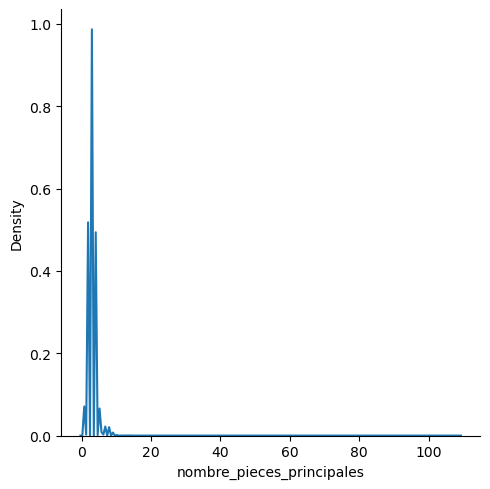

In [162]:
sb.displot(table_finale, x= "nombre_pieces_principales", kind="kde")

### 2- Distribution des differentes variables 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution de la valeur fonciere')

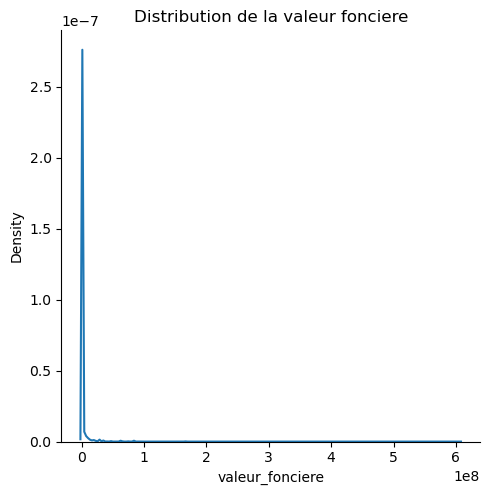

In [8]:
sb.displot(table_finale, x="valeur_fonciere", kind="kde")
plt.title("Distribution de la valeur fonciere")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution du log de la valeur foncicere')

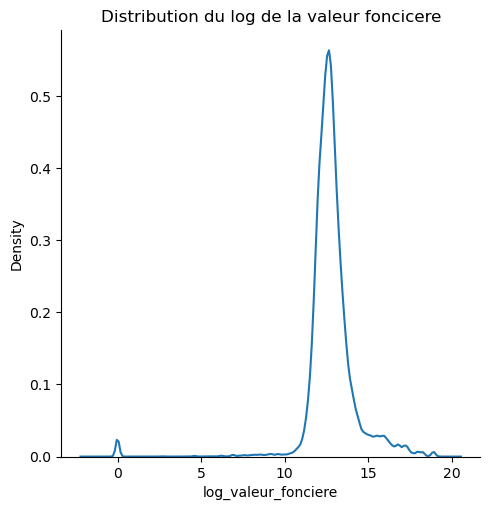

In [179]:
sb.displot(table_finale, x="log_valeur_fonciere", kind='kde')
plt.title("Distribution du log de la valeur foncicere")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


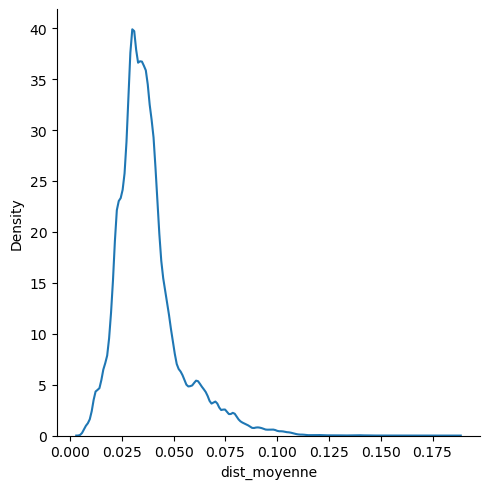

In [287]:
sb.displot(table_finale, x="dist_moyenne", kind="kde")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


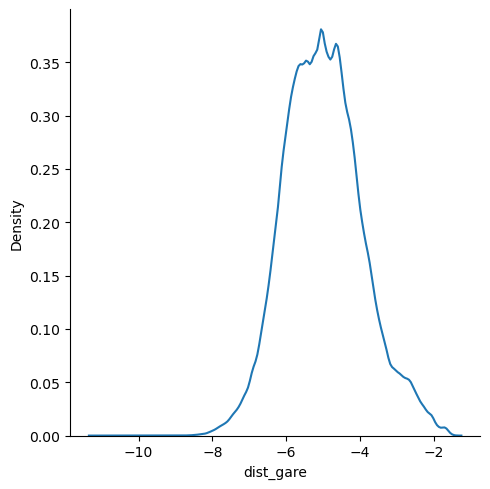

In [294]:
sb.displot(table_finale, x=np.log(table_finale["dist_gare"]), kind="kde")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


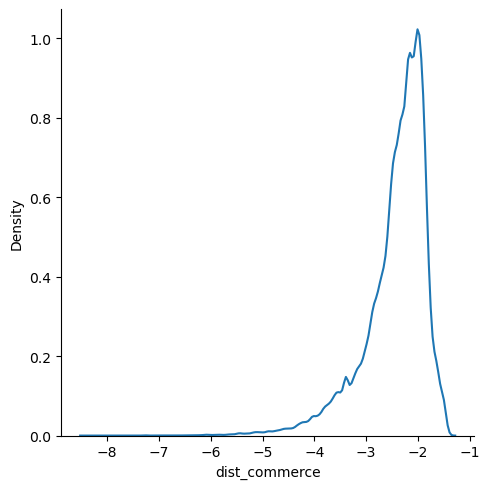

In [9]:
sb.displot(table_finale, x=np.log(table_finale["dist_commerce"]), kind="kde")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


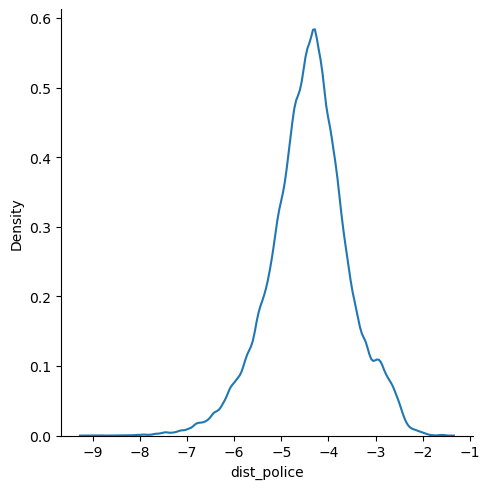

In [298]:
sb.displot(table_finale, x=np.log(table_finale["dist_police"]), kind="kde")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


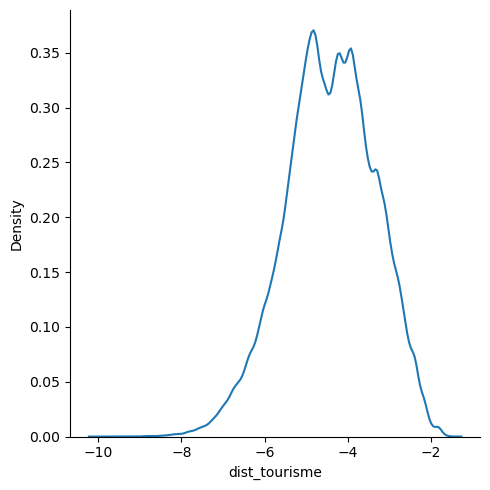

In [299]:
sb.displot(table_finale, x=np.log(table_finale["dist_tourisme"]), kind="kde")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


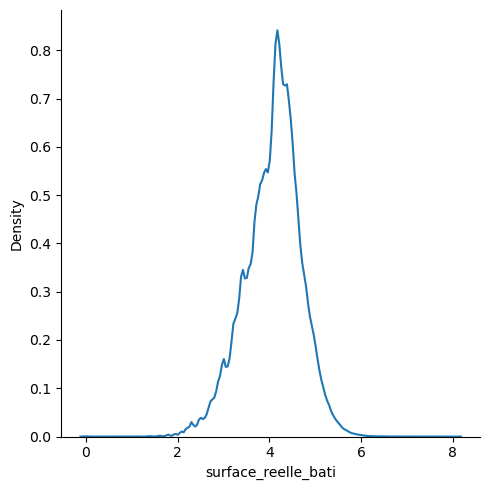

In [292]:
sb.displot(table_finale, x=np.log(table_finale["surface_reelle_bati"]), kind="kde")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


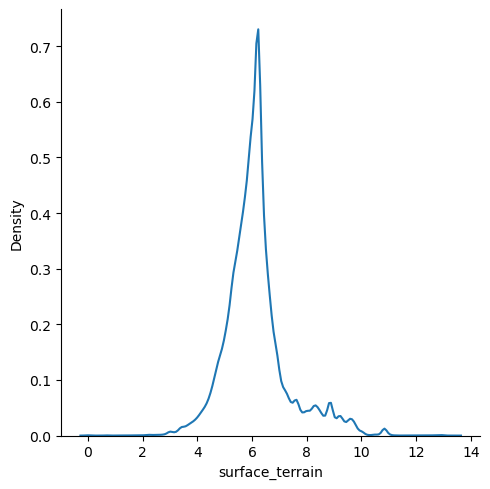

In [305]:
sb.displot(table_finale, x=np.log(table_finale["surface_terrain"]), kind="kde")

<Axes: xlabel='valeur_fonciere', ylabel='surface_reelle_bati'>

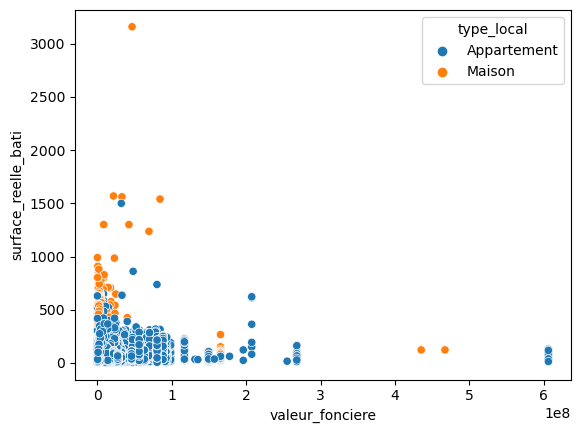

In [9]:
sb.scatterplot(table_finale, x="valeur_fonciere", y="surface_reelle_bati",  hue="type_local")

Text(0, 0.5, 'Valeur foncière')

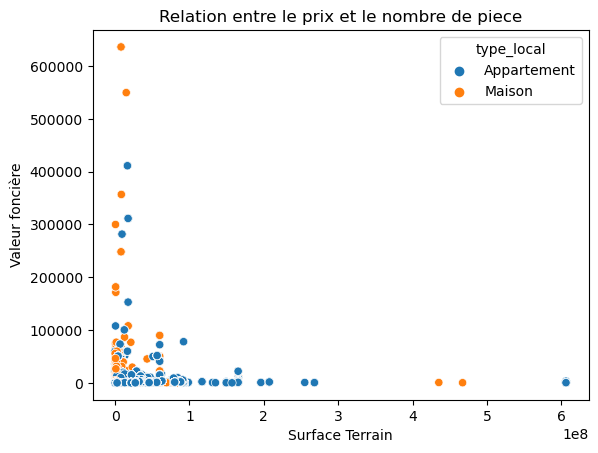

In [238]:
sb.scatterplot(table_finale, x="valeur_fonciere", y="surface_terrain",  hue="type_local")


<Axes: xlabel='code_departement', ylabel='count'>

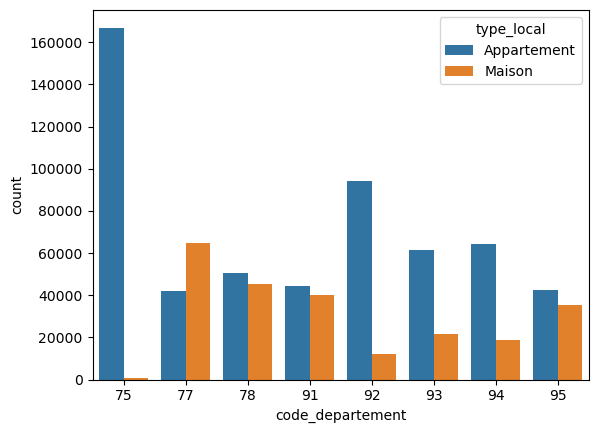

In [61]:
sb.countplot(data=table_finale, x="code_departement", hue="type_local")

### 3- Analyse du prix de l'immobilier 

<Axes: xlabel='code_departement', ylabel='valeur_fonciere'>

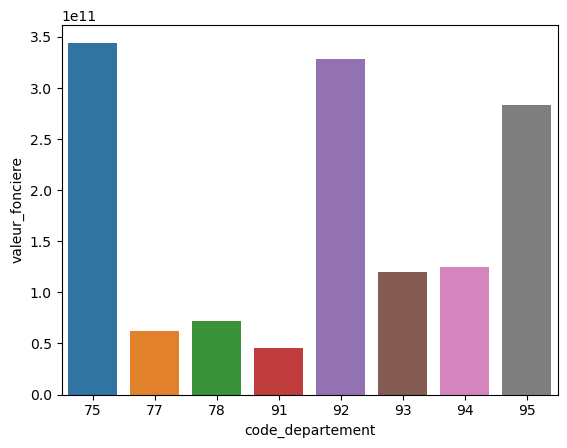

In [55]:
sb.barplot(data=table_finale, x="code_departement", y="valeur_fonciere", errorbar=None, estimator=sum)

<Axes: xlabel='type_local', ylabel='valeur_fonciere'>

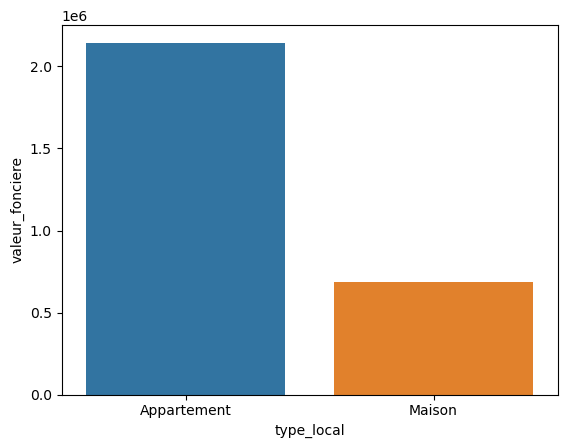

In [177]:
sb.barplot(data=table_finale, x="type_local", y="valeur_fonciere", errorbar=None)

### 4- Influence de la distance sur le prix 

                 valeur_fonciere  dist_gare  dist_commerce  dist_tourisme  \
valeur_fonciere         1.000000  -0.020481       0.019675      -0.041231   
dist_gare              -0.020481   1.000000      -0.026540       0.528078   
dist_commerce           0.019675  -0.026540       1.000000      -0.136436   
dist_tourisme          -0.041231   0.528078      -0.136436       1.000000   
dist_police            -0.027084   0.541787      -0.069753       0.507678   

                 dist_police  
valeur_fonciere    -0.027084  
dist_gare           0.541787  
dist_commerce      -0.069753  
dist_tourisme       0.507678  
dist_police         1.000000  


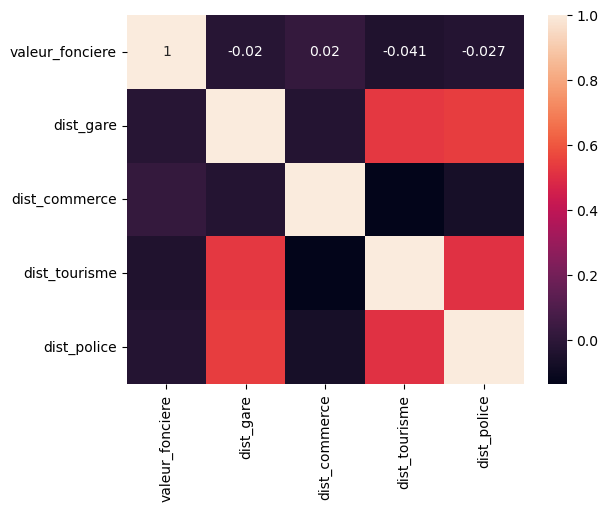

In [13]:
table_dist = table_finale[["valeur_fonciere", "dist_gare","dist_commerce", "dist_tourisme", "dist_police"]]
corr = table_dist.corr()
sb.heatmap(corr,annot=True)
print(corr)

                           valeur_fonciere  surface_reelle_bati  \
valeur_fonciere                   1.000000             0.045305   
surface_reelle_bati               0.045305             1.000000   
nombre_pieces_principales         0.022379             0.837361   
surface_terrain                   0.146874            -0.016876   

                           nombre_pieces_principales  surface_terrain  
valeur_fonciere                             0.022379         0.146874  
surface_reelle_bati                         0.837361        -0.016876  
nombre_pieces_principales                   1.000000        -0.029175  
surface_terrain                            -0.029175         1.000000  


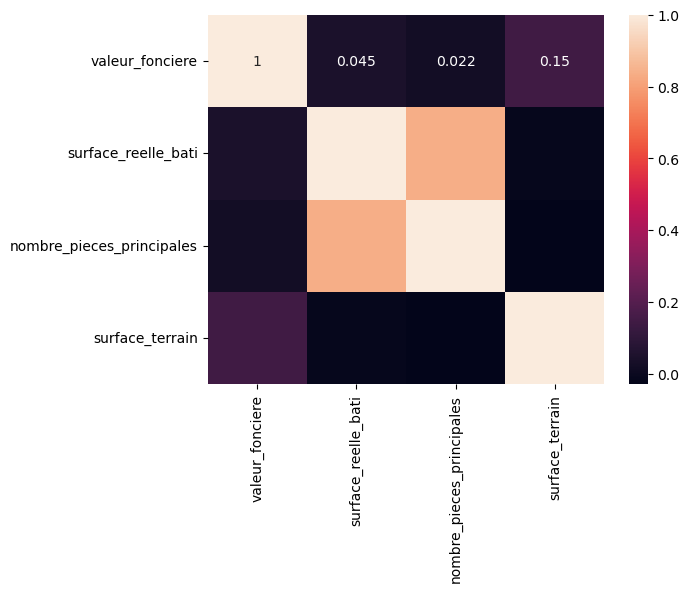

In [80]:
table_local = test[["valeur_fonciere", "surface_reelle_bati", "nombre_pieces_principales", "surface_terrain"]]
corr2 = table_local.corr()
sb.heatmap(corr2, annot=True)
print(corr2)

### 5- Analyse par localisation géographique

In [107]:
# Prix par commune 
table_finale.groupby('nom_commune')['valeur_fonciere'].mean().sort_values(ascending=False)

nom_commune
Aincourt              4.642819e+07
Vigny                 4.610578e+07
Courdimanche          4.100033e+07
Le Perchay            3.321656e+07
Vauréal               2.464916e+07
                          ...     
Baby                  1.405714e+05
Livry-sur-Seine       1.346993e+05
Grisy-sur-Seine       1.232782e+05
Garges-lès-Gonesse    1.116147e+05
Grigny                1.719933e+04
Name: valeur_fonciere, Length: 1280, dtype: float64

### 6- Analyse temporelle

<Axes: title={'center': 'Nombre de ventes par mois'}, xlabel='annee_mutation'>

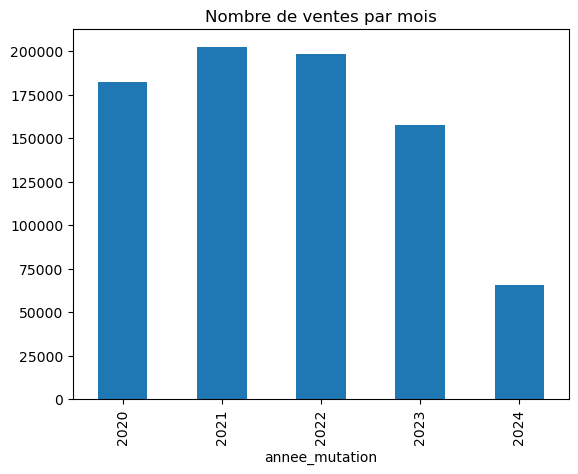

In [122]:
table_finale["annee_mutation"] =pd.to_datetime(table_finale["date_mutation"]).dt.year
table_finale.groupby('annee_mutation')['id_mutation'].count().plot(kind='bar', title='Nombre de ventes par mois')

<Axes: title={'center': 'Nombre de ventes par mois'}, xlabel='mois_mutation'>

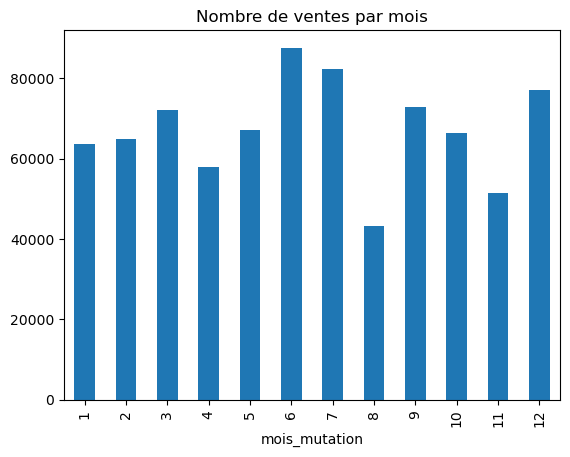

In [124]:
table_finale['mois_mutation'] = pd.to_datetime(table_finale['date_mutation']).dt.month
table_finale.groupby('mois_mutation')['id_mutation'].count().plot(kind='bar', title='Nombre de ventes par mois')

### 6- Segementation par infrastructure proches

In [129]:
# Prix moyen par infrasturcture 
table_finale.groupby('gare_proche')['valeur_fonciere'].mean().sort_values(ascending=False)

gare_proche
Monceau                  4.864340e+07
Concorde                 4.724708e+07
Porte de la Chapelle     4.676256e+07
Cité Universitaire       3.560381e+07
Cergy Le Haut            2.652017e+07
                             ...     
Porte d'Aubervilliers    1.638450e+05
Grigny-Centre            1.426697e+05
Les Flanades             1.381839e+05
Garges - Sarcelles       1.036984e+05
Amédée Gordini           4.768778e+04
Name: valeur_fonciere, Length: 952, dtype: float64

In [147]:
# Distance moyenne par infrastructure

print(table_finale.groupby('type_local')[['dist_gare', 'dist_police', 'dist_tourisme', 'dist_commerce']].mean())

print(table_finale.groupby('code_departement')[['dist_gare', 'dist_police', 'dist_tourisme', 'dist_commerce']].mean())

             dist_gare  dist_police  dist_tourisme  dist_commerce
type_local                                                       
Appartement   0.007610     0.012727       0.014311       0.103878
Maison        0.023936     0.026694       0.033293       0.093503
                  dist_gare  dist_police  dist_tourisme  dist_commerce
code_departement                                                      
75                 0.002544     0.009211       0.004791       0.120518
77                 0.032397     0.030704       0.037796       0.123367
78                 0.017323     0.023725       0.027340       0.060178
91                 0.016037     0.020043       0.026199       0.082095
92                 0.005925     0.010406       0.010888       0.100746
93                 0.007193     0.012353       0.016998       0.083851
94                 0.009223     0.014978       0.015466       0.143949
95                 0.014627     0.018236       0.032545       0.069999


### 7- Comparaisons inter-départementales

In [24]:
table_finale.groupby('code_departement')['surface_reelle_bati'].mean()

code_departement
75    53.274798
77    86.050412
78    87.524689
91    78.899727
92    63.596880
93    61.076503
94    64.403173
95    76.504207
Name: surface_reelle_bati, dtype: float64

<Axes: xlabel='code_departement', ylabel='surface_reelle_bati'>

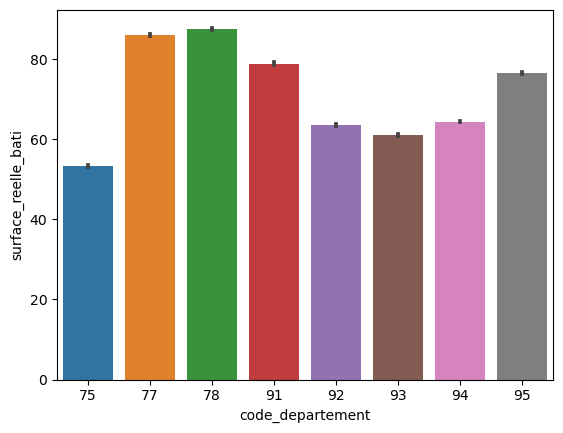

In [162]:
sb.barplot(data=table_finale, x="code_departement", y="surface_reelle_bati")

In [59]:
code_departement = [75, 77, 78, 91, 92, 93, 94, 95]
for col in code_departement :
    table_finale[f"{col}"]= (table_finale["code_departement"] == col).astype(int)
table_finale.sample(5)

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,nom_commune,code_departement,type_local,code_type_local,surface_reelle_bati,nombre_pieces_principales,...,dist_moyenne,prix_par_m2,75,77,78,91,92,93,94,95
670333,2023-1254533,2023-06-21,Vente,785000.0,Montreuil,93,Appartement,2.0,107.0,3.0,...,0.022054,7336.448598,0,0,0,0,0,1,0,0
118926,2020-1373342,2020-02-13,Vente,180000.0,Vitry-sur-Seine,94,Appartement,2.0,42.0,2.0,...,0.043754,4285.714286,0,0,0,0,0,0,1,0
665113,2023-1249097,2023-02-28,Vente,4500000.0,Montreuil,93,Appartement,2.0,37.0,2.0,...,0.034611,121621.621622,0,0,0,0,0,1,0,0
538723,2022-1610752,2022-08-29,Vente,240000.0,Franconville,95,Appartement,2.0,81.0,4.0,...,0.024936,2962.962963,0,0,0,0,0,0,0,1
226451,2021-1336263,2021-07-23,Vente,670000.0,Saint-Rémy-l'Honoré,78,Maison,1.0,277.0,9.0,...,0.060426,2418.772563,0,0,1,0,0,0,0,0


## IV- Modèle Econometrique 

In [121]:
table_finale2 = table_finale.dropna()
y = table_finale2["prix_par_m2"]
x = table_finale2[["surface_reelle_bati", "surface_terrain","nombre_pieces_principales", "dist_gare", 
                   "dist_commerce","dist_tourisme", "dist_police", 
                   "75", "77", "78", "91", "92", "93", "94"]]

X = sm.add_constant(x)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            prix_par_m2   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2440.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:08:11   Log-Likelihood:            -4.1783e+06
No. Observations:              296139   AIC:                         8.357e+06
Df Residuals:                  296124   BIC:                         8.357e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Modèle en logarithme

In [123]:
for col in ["prix_par_m2", "valeur_fonciere", "surface_reelle_bati", "nombre_pieces_principales", "surface_terrain", 
            "dist_gare", "dist_commerce", "dist_tourisme", "dist_police"]:
    table_finale2[f"log_{col}"] = np.log(table_finale2[col])

C:\Users\maserati\AppData\Local\Temp\ipykernel_704\1146986537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_finale2[f"log_{col}"] = np.log(table_finale2[col])
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [66]:
table_finale2.dtypes

id_mutation                       object
date_mutation                     object
nature_mutation                   object
valeur_fonciere                  float64
nom_commune                       object
code_departement                   int64
type_local                        object
code_type_local                  float64
surface_reelle_bati              float64
nombre_pieces_principales        float64
surface_terrain                  float64
latitude                         float64
longitude                        float64
dist_gare                        float64
gare_proche                       object
dist_police                      float64
police_proche                     object
dist_tourisme                    float64
tourisme_proche                   object
dist_commerce                    float64
commerce_proche                   object
dist_moyenne                     float64
prix_par_m2                      float64
75                                 int32
77              

In [129]:
y = table_finale2["log_prix_par_m2"]
x = table_finale2[["log_surface_reelle_bati", "log_surface_terrain", "log_dist_gare",
                   "log_dist_commerce","log_dist_tourisme", "log_dist_police",  
                   "75", "77", "78", "91", "92", "93", "94"]]
X = sm.add_constant(x)

model =sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        log_prix_par_m2   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     8116.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:10:14   Log-Likelihood:            -6.2590e+05
No. Observations:              296139   AIC:                         1.252e+06
Df Residuals:                  296125   BIC:                         1.252e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [131]:
for col in ["prix_par_m2", "nombre_pieces_principales","surface_reelle_bati", "nombre_pieces_principales", "surface_terrain", 
            "dist_gare", "dist_commerce", "dist_tourisme", "dist_police"]:
    table_finale2[f"carre_{col}"] = table_finale2[col]**2
table_finale2.head()

C:\Users\maserati\AppData\Local\Temp\ipykernel_704\3459181484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_finale2[f"carre_{col}"] = table_finale2[col]**2


,id_mutation,date_mutation,nature_mutation,valeur_fonciere,nom_commune,code_departement,type_local,code_type_local,surface_reelle_bati,nombre_pieces_principales,...,log_dist_tourisme,log_dist_police,carre_prix_par_m2,carre_nombre_pieces_principales,carre_surface_reelle_bati,carre_surface_terrain,carre_dist_gare,carre_dist_commerce,carre_dist_tourisme,carre_dist_police
3,2020-1087283,2020-01-02,Vente,320500.0,Combs-la-Ville,77,Maison,1.0,85.0,5.0,...,-2.998377,-3.997904,1.421734e+07,25.0,7225.0,120409.0,0.001098,0.027466,0.002487,0.000337
5,2020-1087285,2020-01-08,Vente,386700.0,Brie-Comte-Robert,77,Maison,1.0,129.0,6.0,...,-2.596495,-4.337639,8.986052e+06,36.0,16641.0,257049.0,0.005974,0.027175,0.005555,0.000171
6,2020-1087286,2020-01-06,Vente,364362.0,Perthes,77,Maison,1.0,120.0,5.0,...,-2.948546,-3.420132,9.219421e+06,25.0,14400.0,1907161.0,0.003481,0.026907,0.002747,0.001070
7,2020-1087287,2020-01-06,Vente,217000.0,Aubepierre-Ozouer-le-Repos,77,Maison,1.0,99.0,6.0,...,-2.228221,-3.023011,4.804510e+06,36.0,9801.0,57600.0,0.002724,0.025706,0.011604,0.002367
8,2020-1087287,2020-01-06,Vente,217000.0,Aubepierre-Ozouer-le-Repos,77,Maison,1.0,99.0,6.0,...,-2.228221,-3.023011,4.804510e+06,36.0,9801.0,781456.0,0.002724,0.025706,0.011604,0.002367


In [134]:
y = table_finale2["log_prix_par_m2"]
x = table_finale2[["surface_reelle_bati", "nombre_pieces_principales",
                   "carre_surface_reelle_bati", "surface_terrain", 
                  "dist_commerce", "carre_dist_commerce", "dist_tourisme", "dist_police","carre_dist_police",  
                   "75", "77", "78", "91", "92", "93", "94"]]

X = sm.add_constant(x)

model = sm.OLS(y, X).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        log_prix_par_m2   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     6043.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:16:06   Log-Likelihood:            -6.2918e+05
No. Observations:              296139   AIC:                         1.258e+06
Df Residuals:                  296122   BIC:                         1.259e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## 6- Sans valeurs aberante

In [136]:
# Borne inferieur 
table_finale3 = table_finale2
for col in ["log_prix_par_m2", "log_surface_reelle_bati", "log_surface_terrain", 
            "log_nombre_pieces_principales", "log_dist_gare",
                   "log_dist_commerce","log_dist_tourisme", "log_dist_police"]:
    table_finale3[f"borneInf_{col}"] = table_finale2[col].mean() - 3*table_finale2[col].std()
table_finale3.head()

C:\Users\maserati\AppData\Local\Temp\ipykernel_704\3097694559.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_finale3[f"borneInf_{col}"] = table_finale2[col].mean() - 3*table_finale2[col].std()


,id_mutation,date_mutation,nature_mutation,valeur_fonciere,nom_commune,code_departement,type_local,code_type_local,surface_reelle_bati,nombre_pieces_principales,...,carre_dist_tourisme,carre_dist_police,borneInf_log_prix_par_m2,borneInf_log_surface_reelle_bati,borneInf_log_surface_terrain,borneInf_log_nombre_pieces_principales,borneInf_log_dist_gare,borneInf_log_dist_commerce,borneInf_log_dist_tourisme,borneInf_log_dist_police
3,2020-1087283,2020-01-02,Vente,320500.0,Combs-la-Ville,77,Maison,1.0,85.0,5.0,...,0.002487,0.000337,1.75559,2.62081,2.738516,NaN,-7.587086,-4.62803,-6.850558,-6.660487
5,2020-1087285,2020-01-08,Vente,386700.0,Brie-Comte-Robert,77,Maison,1.0,129.0,6.0,...,0.005555,0.000171,1.75559,2.62081,2.738516,NaN,-7.587086,-4.62803,-6.850558,-6.660487
6,2020-1087286,2020-01-06,Vente,364362.0,Perthes,77,Maison,1.0,120.0,5.0,...,0.002747,0.001070,1.75559,2.62081,2.738516,NaN,-7.587086,-4.62803,-6.850558,-6.660487
7,2020-1087287,2020-01-06,Vente,217000.0,Aubepierre-Ozouer-le-Repos,77,Maison,1.0,99.0,6.0,...,0.011604,0.002367,1.75559,2.62081,2.738516,NaN,-7.587086,-4.62803,-6.850558,-6.660487
8,2020-1087287,2020-01-06,Vente,217000.0,Aubepierre-Ozouer-le-Repos,77,Maison,1.0,99.0,6.0,...,0.011604,0.002367,1.75559,2.62081,2.738516,NaN,-7.587086,-4.62803,-6.850558,-6.660487


In [138]:
# Borne Superieur 
for col in ["log_prix_par_m2", "log_surface_reelle_bati", "log_surface_terrain", "log_dist_gare","log_nombre_pieces_principales",
                   "log_dist_commerce","log_dist_tourisme", "log_dist_police"]:
    table_finale3[f"borneSup_{col}"] = table_finale3[col].mean() + 3*table_finale3[col].std()
table_finale3.head()

C:\Users\maserati\AppData\Local\Temp\ipykernel_704\1171888989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_finale3[f"borneSup_{col}"] = table_finale3[col].mean() + 3*table_finale3[col].std()


,id_mutation,date_mutation,nature_mutation,valeur_fonciere,nom_commune,code_departement,type_local,code_type_local,surface_reelle_bati,nombre_pieces_principales,...,borneInf_log_dist_tourisme,borneInf_log_dist_police,borneSup_log_prix_par_m2,borneSup_log_surface_reelle_bati,borneSup_log_surface_terrain,borneSup_log_dist_gare,borneSup_log_nombre_pieces_principales,borneSup_log_dist_commerce,borneSup_log_dist_tourisme,borneSup_log_dist_police
3,2020-1087283,2020-01-02,Vente,320500.0,Combs-la-Ville,77,Maison,1.0,85.0,5.0,...,-6.850558,-6.660487,15.750989,6.103935,9.558295,-1.280483,NaN,-0.457395,-0.984042,-1.487054
5,2020-1087285,2020-01-08,Vente,386700.0,Brie-Comte-Robert,77,Maison,1.0,129.0,6.0,...,-6.850558,-6.660487,15.750989,6.103935,9.558295,-1.280483,NaN,-0.457395,-0.984042,-1.487054
6,2020-1087286,2020-01-06,Vente,364362.0,Perthes,77,Maison,1.0,120.0,5.0,...,-6.850558,-6.660487,15.750989,6.103935,9.558295,-1.280483,NaN,-0.457395,-0.984042,-1.487054
7,2020-1087287,2020-01-06,Vente,217000.0,Aubepierre-Ozouer-le-Repos,77,Maison,1.0,99.0,6.0,...,-6.850558,-6.660487,15.750989,6.103935,9.558295,-1.280483,NaN,-0.457395,-0.984042,-1.487054
8,2020-1087287,2020-01-06,Vente,217000.0,Aubepierre-Ozouer-le-Repos,77,Maison,1.0,99.0,6.0,...,-6.850558,-6.660487,15.750989,6.103935,9.558295,-1.280483,NaN,-0.457395,-0.984042,-1.487054


In [139]:
len(table_finale3)

296139

In [140]:
for col  in ["log_prix_par_m2", "log_surface_reelle_bati", "log_surface_terrain","log_nombre_pieces_principales", "log_dist_gare",
                   "log_dist_commerce","log_dist_tourisme", "log_dist_police"]:
    table_finale3 = table_finale3[(table_finale3[f"borneInf_{col}"] < table_finale3[col]) & (table_finale3[col] < table_finale3[f"borneSup_{col}"])] 

In [141]:
print(len(table_finale3))

0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution de prix sans aberante')

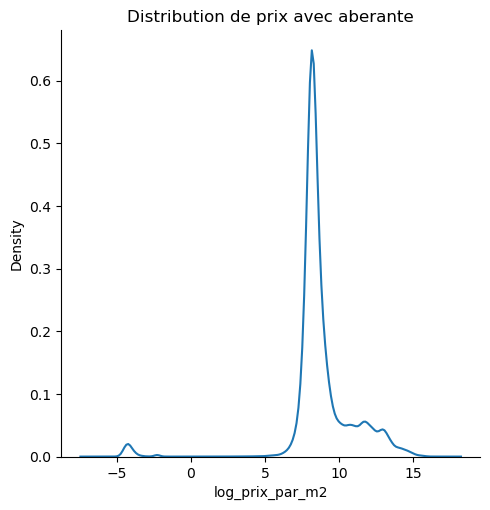

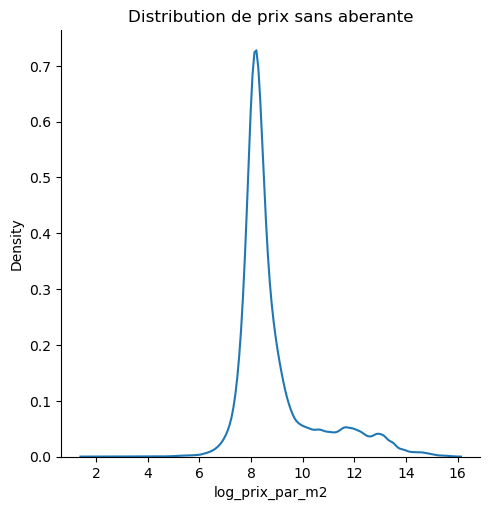

In [98]:
sb.displot(data= table_finale2, x = "log_prix_par_m2" , kind = "kde")
plt.title("Distribution de prix avec aberante")
sb.displot(data= table_finale3, x = "log_prix_par_m2" , kind = "kde")
plt.title("Distribution de prix sans aberante") 

In [79]:
y = table_finale3["log_prix_par_m2"]
x = table_finale3[["log_surface_reelle_bati", "log_surface_terrain", "log_dist_gare",
                   "log_dist_commerce", "log_dist_tourisme", "log_dist_police", 
                   "75", "77", "78", "91", "92", "93", "94"]]

X = sm.add_constant(x)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        log_prix_par_m2   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                 3.521e+04
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:59:02   Log-Likelihood:            -3.7864e+05
No. Observations:              277035   AIC:                         7.573e+05
Df Residuals:                  277021   BIC:                         7.575e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution des residus')

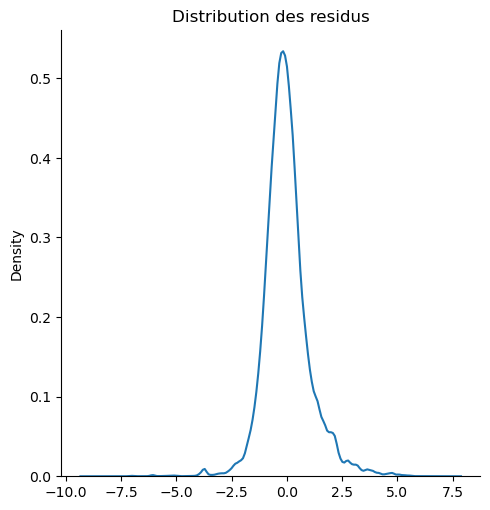

In [113]:
sb.displot(model.resid, kind="kde")
plt.title("Distribution des residus")

## V- Machine learning 

In [80]:
import sklearn
from sklearn.linear_model import LinearRegression    
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [81]:
X = table_finale3[["log_surface_reelle_bati", "log_surface_terrain", "log_dist_gare",
                   "log_dist_commerce","log_dist_tourisme", "log_dist_police", 
                   "75", "77", "78", "91", "92", "93", "94"]]
y = table_finale3["log_prix_par_m2"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression() 

model.fit(X_train, y_train)        # entrainement 
test = model.score(X_test, y_test) # test 
prediction = model.predict(X_test) # prediction 

print("Score du modele:", test) # R2
print("R2:", r2_score(y_test, prediction)) # equivalent a 

Score du modele: 0.6172856250755745
R2: 0.6172856250755745


In [82]:
# Avec Random forest 
X = table_finale3[["log_surface_reelle_bati", "log_surface_terrain", "log_dist_gare",
                   "log_dist_commerce","log_dist_tourisme", "log_dist_police", 
                   "75", "77", "78", "91", "92", "93", "94"]]
y = table_finale3["log_prix_par_m2"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

model = RandomForestRegressor(n_estimators= 120, random_state=42)
model.fit(X_train, y_train) 
test = model.score(X_test, y_test)
prediction = model.predict(X_test)
print("Score", test)

Score 0.919509552341588


Text(0.5, 0, 'Valeur Reelle')

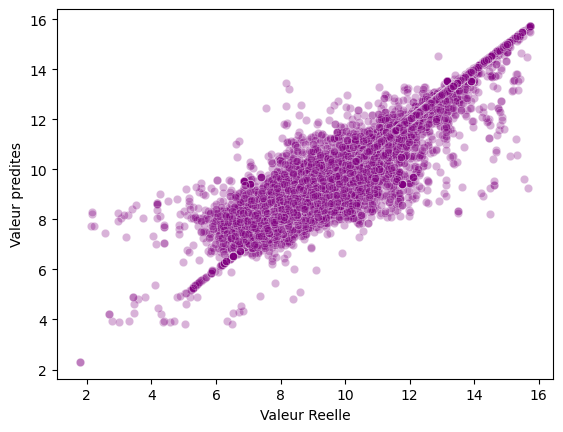

In [83]:
sb.scatterplot(x=y_test, y=prediction, alpha=0.3, color="purple") 
plt.ylabel("Valeur predites")
plt.xlabel("Valeur Reelle")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution des residus')

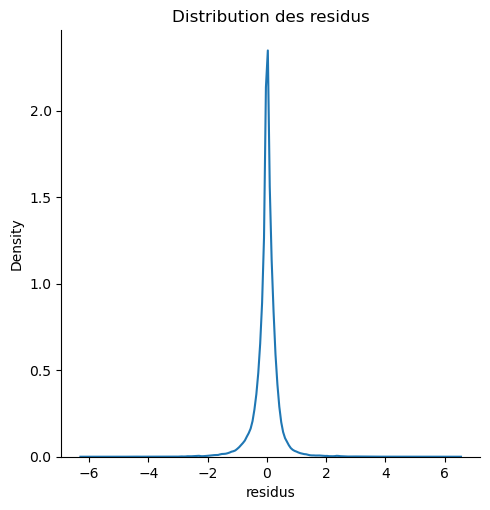

In [94]:
residus = y_test - prediction
sb.displot(residus, kind="kde")
plt.xlabel("residus")
plt.title("Distribution des residus")

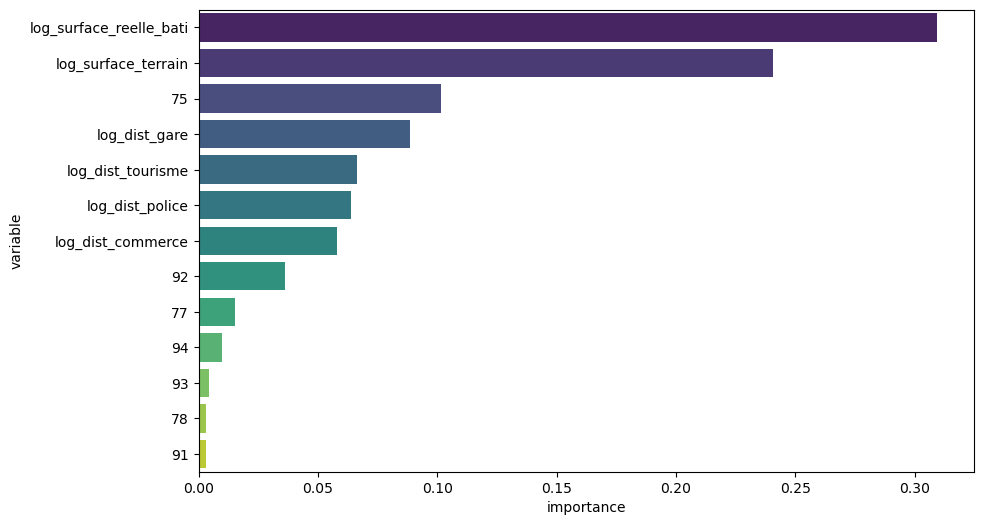

In [110]:
importance = model.feature_importances_
feature_names= X.columns
df = pd.DataFrame({"variable" : feature_names, "importance" : importance}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 6))
sb.barplot(y = "variable", x = "importance", data =df, palette='viridis')
plt.show()